Data Processing and Data Cleaning

1- Processing the Data
2- Cleaning the data
3- Exploratory Analysis and Data Visualization
 

A brief about Data:  

This dataset is belong to National Institute of Diabetes and Digestive and Kidney Diseases.
Purpose of this dataset is to diagnose whether or not a patient has diabetes. The all patients are Females over the age of 21 of Pima Indian Heritage.

In [3]:
# Import necessary Libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy import stats

In [4]:
# Storing the data set
diabet_data = pd.read_csv("pima-indians-diabetes.csv")
#  Reading data
df = diabet_data.copy()
df = df.dropna()
df.head()

,time_pregnant,plasma_glucose,blood_pressure,thickness,serrum_insulin,BMI,pedigreen,age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time_pregnant   768 non-null    int64  
 1   plasma_glucose  768 non-null    int64  
 2   blood_pressure  768 non-null    int64  
 3   thickness       768 non-null    int64  
 4   serrum_insulin  768 non-null    int64  
 5   BMI             768 non-null    float64
 6   pedigreen       768 non-null    float64
 7   age             768 non-null    int64  
 8   Diabetes        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [6]:
# From the data description,there are 768 columns for the data. There are columns have interesting values such as the max value for pregnancies is 17.

df.describe()

,time_pregnant,plasma_glucose,blood_pressure,thickness,serrum_insulin,BMI,pedigreen,age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# I divide the rows of those the people have tested positive for diabetes (denoted by diabetes value 1). I create the other dataframe for all those who tested negative for diabetes (denoted by diabetes value 0) to identify the main differences between the people who tested positive and those who tested negative for diabetes.

# And then can visualize data for the two dataframes to try and observe trends for different variables and how they differ for people who test negative and the people who test positive.

In [7]:
# Processing the Data
# dataframe for negative diabetes
negative_df = df[df['Diabetes'] == 0]
negative_df.head()



,time_pregnant,plasma_glucose,blood_pressure,thickness,serrum_insulin,BMI,pedigreen,age,Diabetes
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [8]:
# Processing the Data
# dataframe for positive diabetes
positive_df = df[df['Diabetes'] == 1]
positive_df.head()

,time_pregnant,plasma_glucose,blood_pressure,thickness,serrum_insulin,BMI,pedigreen,age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [9]:
# Compute correlation matrix
# Pearson’s Correlation Coefficient assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. On the other hand, a value of 0 shows no correlation at all. 
correlations_coef = df.corr(method ='pearson') 
print(correlations_coef)

                time_pregnant  plasma_glucose  blood_pressure  thickness  \
time_pregnant        1.000000        0.129459        0.141282  -0.081672   
plasma_glucose       0.129459        1.000000        0.152590   0.057328   
blood_pressure       0.141282        0.152590        1.000000   0.207371   
thickness           -0.081672        0.057328        0.207371   1.000000   
serrum_insulin      -0.073535        0.331357        0.088933   0.436783   
BMI                  0.017683        0.221071        0.281805   0.392573   
pedigreen           -0.033523        0.137337        0.041265   0.183928   
age                  0.544341        0.263514        0.239528  -0.113970   
Diabetes             0.221898        0.466581        0.065068   0.074752   

                serrum_insulin       BMI  pedigreen       age  Diabetes  
time_pregnant        -0.073535  0.017683  -0.033523  0.544341  0.221898  
plasma_glucose        0.331357  0.221071   0.137337  0.263514  0.466581  
blood_pressure   

In [10]:
# The skew of each attribute can be calculated using
# the skew() function on the Pandas DataFrame

skew_data = df.skew() 
print("Skew of attribute distributions in the data:\n") 
print(skew_data) 

Skew of attribute distributions in the data:

time_pregnant     0.901674
plasma_glucose    0.173754
blood_pressure   -1.843608
thickness         0.109372
serrum_insulin    2.272251
BMI              -0.428982
pedigreen         1.919911
age               1.129597
Diabetes          0.635017
dtype: float64


# Cleaning the data
# Created helper function called replace_mean which will replace all the zero values in these column with the mean values for these respective columns to avoid getting inaccurate results. Note that we do not replace 0 values in the pregnancy column as this simply means that the person is not pregnant, It is not necessarily an outlier.

In [12]:
def replace_mean(data, val, value):
  col = data.loc[data[val] != 0, [val, value]].groupby(value).mean()
  df.loc[(data[val] == 0)&(data[value] == 0), val] = col.iloc[0][0]
  df.loc[(data[val] == 0)&(data[value] == 1), val] = col.iloc[1][0]
  
    # run the function
for column in ['plasma_glucose', 'blood_pressure', 'thickness', 'serrum_insulin', 'BMI']:
  replace_mean(df, column, 'Diabetes')  

In [13]:
df.describe()

,time_pregnant,plasma_glucose,blood_pressure,thickness,serrum_insulin,BMI,pedigreen,age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


z score is a value assigned to every given point based on its mean and standard deviation where the mean is zero and the standard deviation is one. The further the z score is from zero, the more of an outlier it is in the dataset.

calculate the z score values for each of the entires in the dataset.then look at the list of z score values and estimate a general range that they fall under. consider this range to be a threshold for acceptable values in the dataframe. Note using absolute z score values.

In [15]:
z_score = np.abs(stats.zscore(df))
print(z_score)

[[0.63994726 0.86401998 0.03538894 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.20547775 0.53133213 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 2.01374094 0.69664653 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.02290762 0.03538894 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.14133823 1.02727533 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.94268439 0.20070334 ... 0.47378505 0.87137393 0.73212021]]


<AxesSubplot: xlabel='BMI', ylabel='Count'>

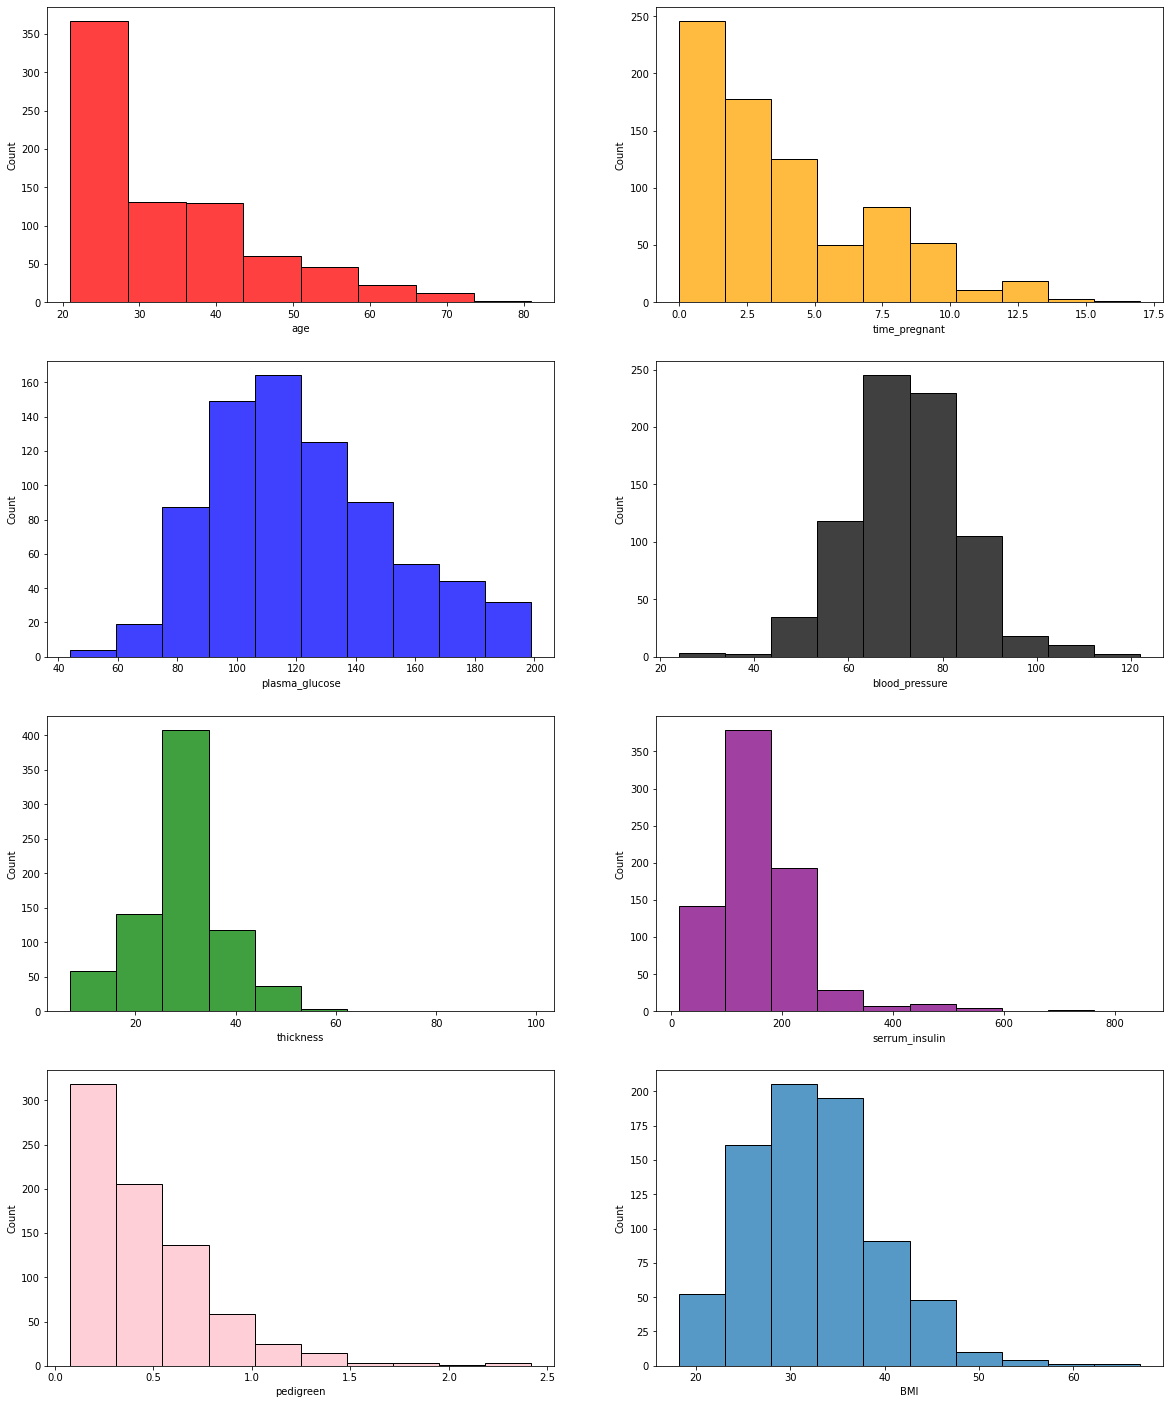

In [14]:
# Histogram and density graphs of all variables were accessed.
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4,2, figsize=(20,25))
sns.histplot(df.age, bins = 8, color = 'red', ax=ax[0,0]) 
sns.histplot(df.time_pregnant, bins = 10, color = 'orange', ax=ax[0,1]) 
sns.histplot(df.plasma_glucose, bins = 10, color = 'blue', ax=ax[1,0]) 
sns.histplot(df.blood_pressure, bins = 10, color = 'black', ax=ax[1,1]) 
sns.histplot(df.thickness, bins = 10, color = 'green', ax=ax[2,0])
sns.histplot(df.serrum_insulin, bins = 10, color = 'purple', ax=ax[2,1])
sns.histplot(df.pedigreen, bins = 10, color = 'pink', ax=ax[3,0]) 
sns.histplot(df.BMI, bins = 10, ax=ax[3,1]) 

<AxesSubplot: xlabel='BMI', ylabel='Count'>

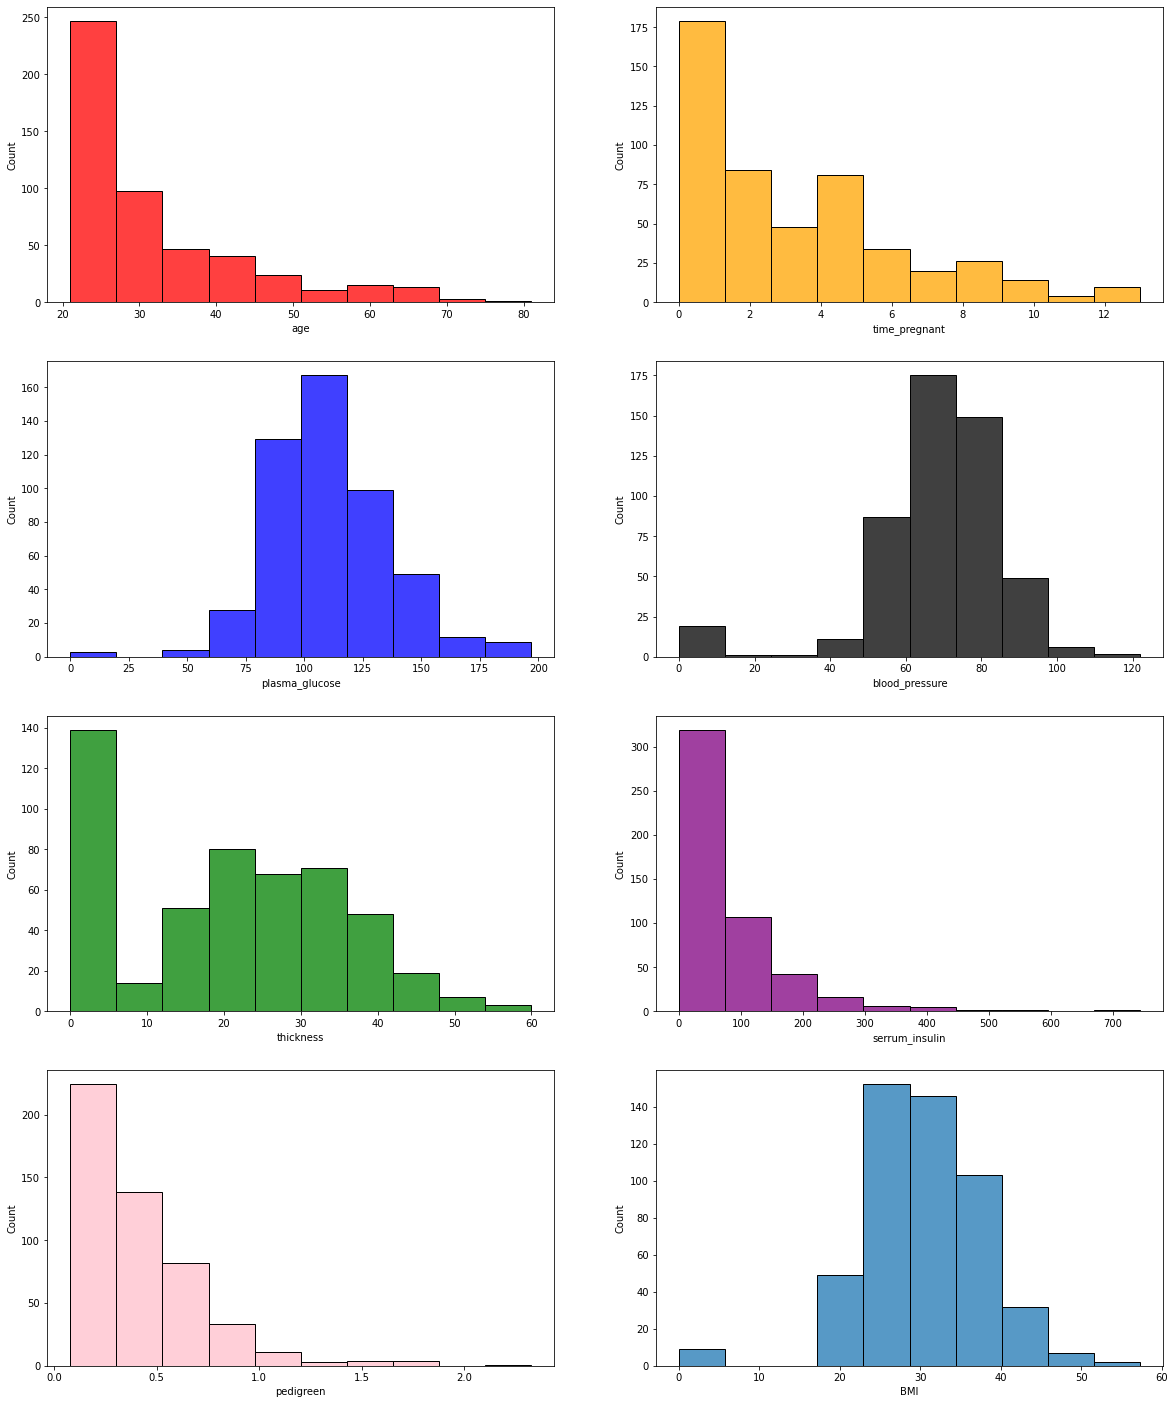

In [18]:
# plot histograms of the variables for only the people who tested negative for diabetes in the dataframe.
fig, ax = plt.subplots(4,2, figsize=(20,25))
sns.histplot(negative_df.age, bins = 10, color = 'red', ax=ax[0,0]) 
sns.histplot(negative_df.time_pregnant, bins = 10, color = 'orange', ax=ax[0,1]) 
sns.histplot(negative_df.plasma_glucose, bins = 10, color = 'blue', ax=ax[1,0]) 
sns.histplot(negative_df.blood_pressure, bins = 10, color = 'black', ax=ax[1,1]) 
sns.histplot(negative_df.thickness, bins = 10, color = 'green', ax=ax[2,0])
sns.histplot(negative_df.serrum_insulin, bins = 10, color = 'purple', ax=ax[2,1])
sns.histplot(negative_df.pedigreen, bins = 10, color = 'pink', ax=ax[3,0]) 
sns.histplot(negative_df.BMI, bins = 10, ax=ax[3,1]) 

<AxesSubplot: xlabel='BMI', ylabel='Count'>

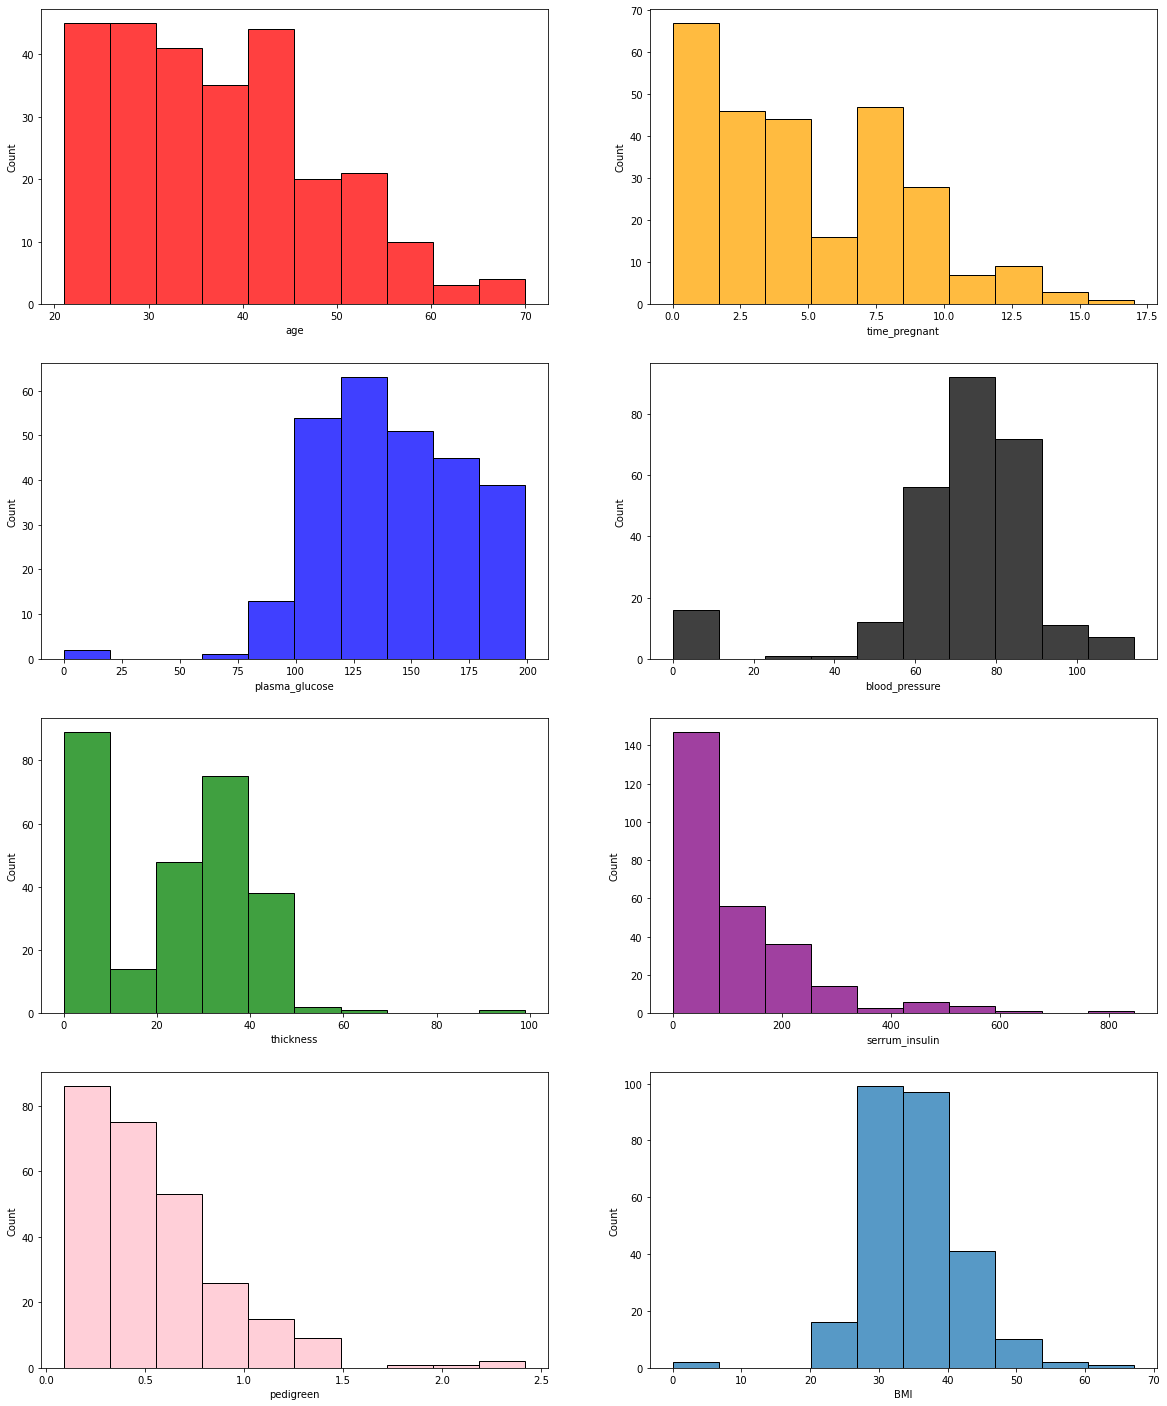

In [19]:
# plot the histograms of variables for all the people who tested positive in the dataframe
fig, ax = plt.subplots(4,2, figsize=(20,25))
sns.histplot(positive_df.age, bins = 10, color = 'red', ax=ax[0,0]) 
sns.histplot(positive_df.time_pregnant, bins = 10, color = 'orange', ax=ax[0,1]) 
sns.histplot(positive_df.plasma_glucose, bins = 10, color = 'blue', ax=ax[1,0]) 
sns.histplot(positive_df.blood_pressure, bins = 10, color = 'black', ax=ax[1,1]) 
sns.histplot(positive_df.thickness, bins = 10, color = 'green', ax=ax[2,0])
sns.histplot(positive_df.serrum_insulin, bins = 10, color = 'purple', ax=ax[2,1])
sns.histplot(positive_df.pedigreen, bins = 10, color = 'pink', ax=ax[3,0]) 
sns.histplot(positive_df.BMI, bins = 10, ax=ax[3,1]) 

Text(0.5, 0, 'Glucose Levels in mg/dl')

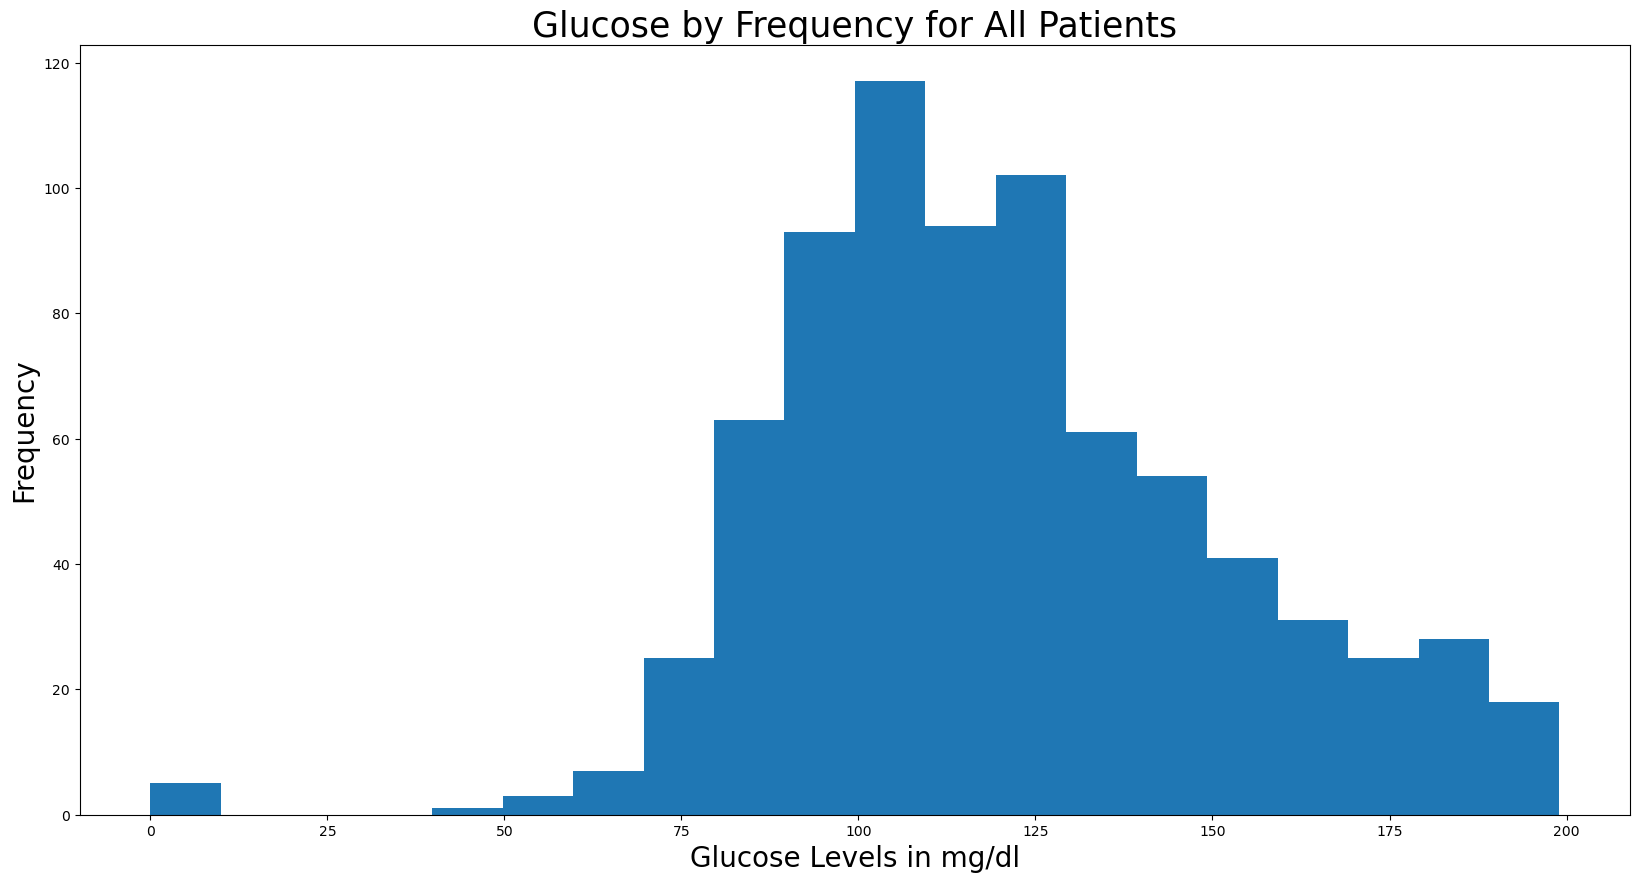

In [ ]:
plt.figure(figsize = (20, 10))
plt.hist(df['plasma_glucose'],histtype='stepfilled',bins=20)
plt.title('Glucose by Frequency for All Patients', size = 25)
plt.ylabel('Frequency', size = 20)
plt.xlabel('Glucose Levels in mg/dl', size = 20)

The histogram below represents the glucose levels of people who tested positive for Diabetes. The majority of patients with diabetes have higher Glucose levels. Most patients have a value of around 100-125 but it slowly tapers off. Compared to the other histograms this one is definielty a lot more right leaning and thus has a lot higher values than the table where people tested negative

Text(0.5, 0, 'Glucose Levels in mg/dl')

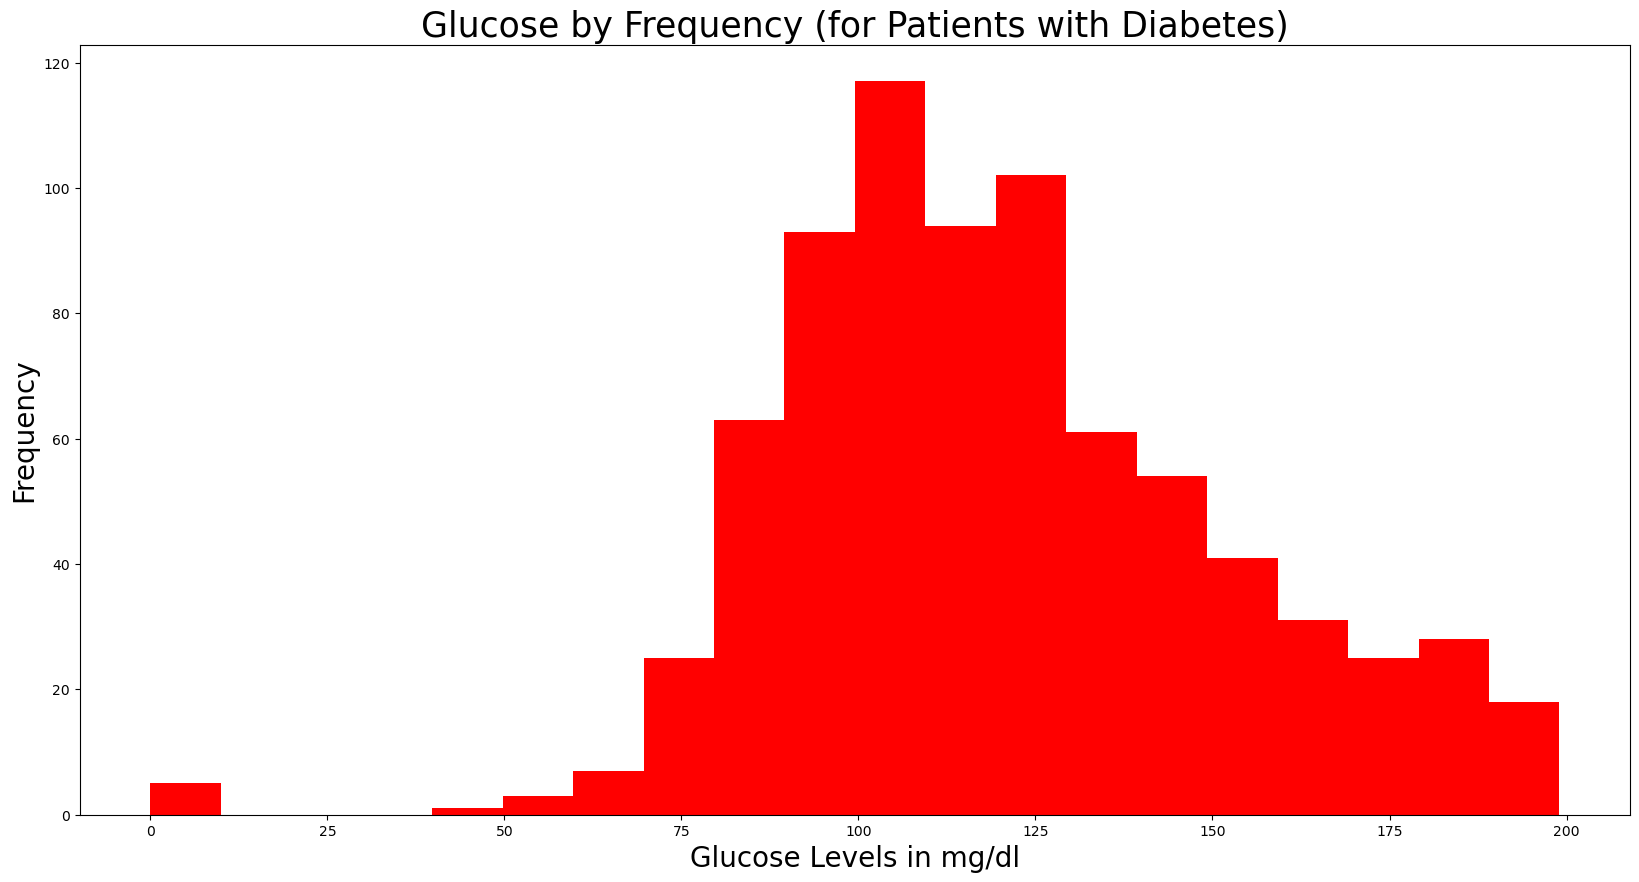

In [ ]:
plt.figure(figsize = (20, 10))
plt.hist(df['plasma_glucose'],histtype='stepfilled',bins=20, color = 'red')
plt.title('Glucose by Frequency (for Patients with Diabetes)', size = 25)
plt.ylabel('Frequency', size = 20)
plt.xlabel('Glucose Levels in mg/dl', size = 20)

The histogram below represents the glucose levels of people who tested positive for Diabetes. The majority of patients with diabetes have higher Glucose levels. Most patients have a value of around 100-125 but it slowly tapers off. Compared to the other histograms this one is definielty a lot more right leaning and thus has a lot higher values than the table where people tested negative

Text(0.5, 0, 'Glucose Levels in mg/dl')

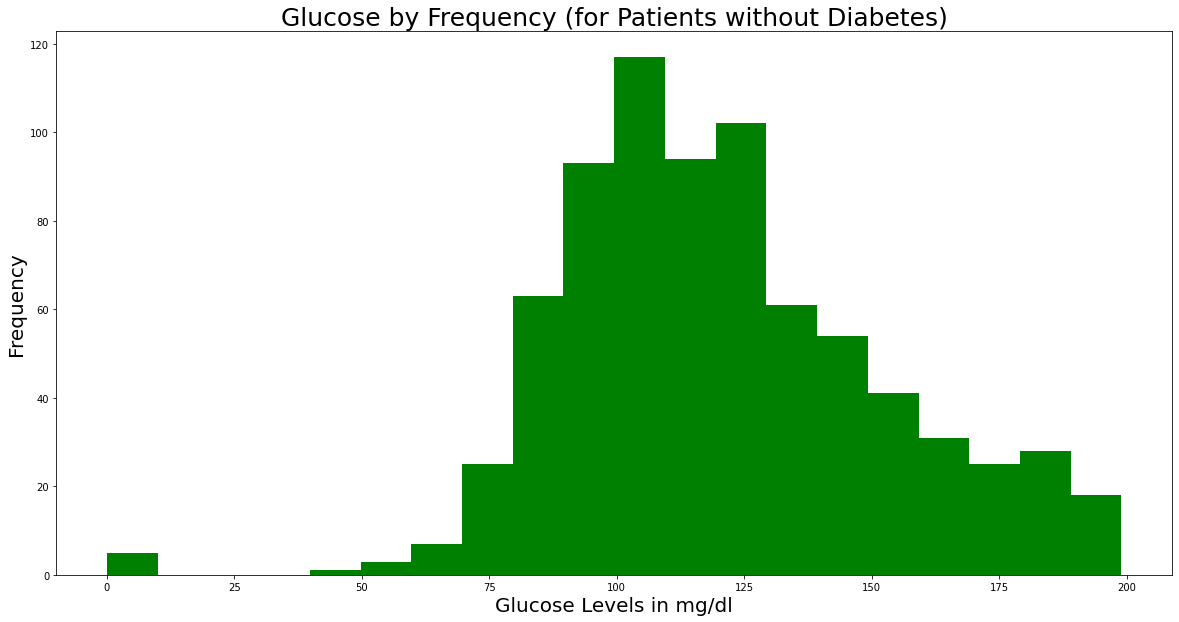

In [ ]:
plt.figure(figsize = (20, 10))
plt.hist(df['plasma_glucose'],histtype='stepfilled',bins=20, color = 'green')
plt.title('Glucose by Frequency (for Patients without Diabetes)', size = 25)
plt.ylabel('Frequency', size = 20)
plt.xlabel('Glucose Levels in mg/dl', size = 20)
